<a href="https://colab.research.google.com/github/nastyha002/nastyha002/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("/content/Clustering.csv")
df

,Unnamed: 0,x,y
0,1,3.367596,3.536694
1,2,2.667870,4.479919
2,3,1.344171,3.282591
3,4,1.389414,4.683227
4,5,1.644644,4.320822
...,...,...,...
185,186,8.610144,10.429247
186,187,6.775686,11.724382
187,188,7.023465,9.632056
188,189,6.115584,9.449803


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [ ]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [2]:
df_cluster = df.copy()

In [3]:
df_cluster.drop(['Unnamed: 0'], axis= 1 , inplace= True )

<Axes: >

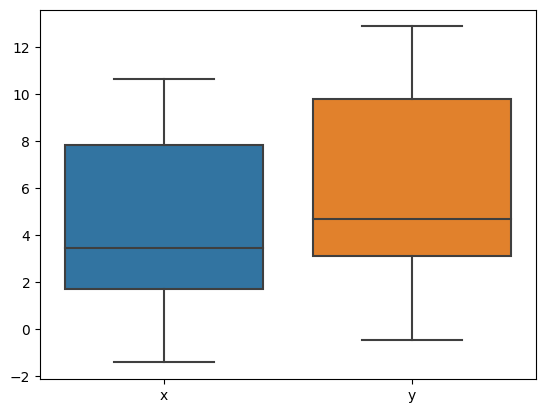

In [4]:
sns.boxplot(df_cluster)

In [5]:
df_cluster

,x,y
0,3.367596,3.536694
1,2.667870,4.479919
2,1.344171,3.282591
3,1.389414,4.683227
4,1.644644,4.320822
...,...,...
185,8.610144,10.429247
186,6.775686,11.724382
187,7.023465,9.632056
188,6.115584,9.449803


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>]],
      dtype=object)

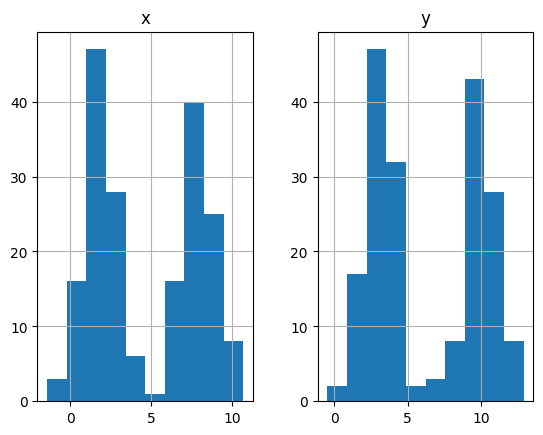

In [6]:
df_cluster.hist()

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_features = df_cluster.select_dtypes(include=['float64']).columns

In [10]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["x"].unique()

array([0.39625158, 0.33843583, 0.22906359, 0.23280182, 0.25389052,
       0.18212001, 0.38770021, 0.10290838, 0.21204621, 0.18072669,
       0.29684648, 0.11024952, 0.26249062, 0.28968614, 0.32098993,
       0.16879138, 0.35027143, 0.34269169, 0.27605419, 0.38502061,
       0.23893627, 0.28489946, 0.3266028 , 0.32849916, 0.20306065,
       0.40741214, 0.25857869, 0.22970259, 0.13674898, 0.24193391,
       0.32631489, 0.30289945, 0.28323116, 0.33515978, 0.41406849,
       0.22342707, 0.13895249, 0.2706922 , 0.34093787, 0.16603197,
       0.22022609, 0.2501325 , 0.1303623 , 0.27248077, 0.30416699,
       0.26808861, 0.29399103, 0.31119397, 0.22361286, 0.27556969,
       0.30762426, 0.32353084, 0.37794454, 0.1747661 , 0.12776834,
       0.38478118, 0.18695936, 0.33865645, 0.20023727, 0.27231004,
       0.18529645, 0.15237889, 0.21735152, 0.20295573, 0.35153526,
       0.05881404, 0.3285402 , 0.26373556, 0.25654732, 0.24883287,
       0.27182819, 0.        , 0.20053933, 0.3505963 , 0.29014

In [11]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["y"].unique()

array([0.30015553, 0.37069713, 0.28115178, 0.38590205, 0.35879868,
       0.23411598, 0.3118275 , 0.22956582, 0.24508207, 0.38327183,
       0.28657339, 0.29040704, 0.20904037, 0.43325995, 0.17217808,
       0.27814383, 0.17992266, 0.2145896 , 0.37490906, 0.26091939,
       0.16602868, 0.20233244, 0.31071817, 0.20260431, 0.1430975 ,
       0.33631439, 0.18972523, 0.29829322, 0.2059705 , 0.25697395,
       0.28112247, 0.09826658, 0.29147865, 0.32634387, 0.3319979 ,
       0.29178413, 0.27632471, 0.26912994, 0.24913486, 0.34135157,
       0.26900555, 0.21750092, 0.24826883, 0.10737993, 0.27066502,
       0.22064581, 0.13641741, 0.17829785, 0.31647698, 0.36392147,
       0.31905058, 0.22196027, 0.14069347, 0.38807108, 0.3382015 ,
       0.30460182, 0.        , 0.28275619, 0.17738452, 0.22547301,
       0.25664374, 0.36625799, 0.22148416, 0.2327414 , 0.39806382,
       0.36929048, 0.3177132 , 0.45424553, 0.19722834, 0.33118452,
       0.20274652, 0.31700179, 0.23479602, 0.3745059 , 0.17993

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

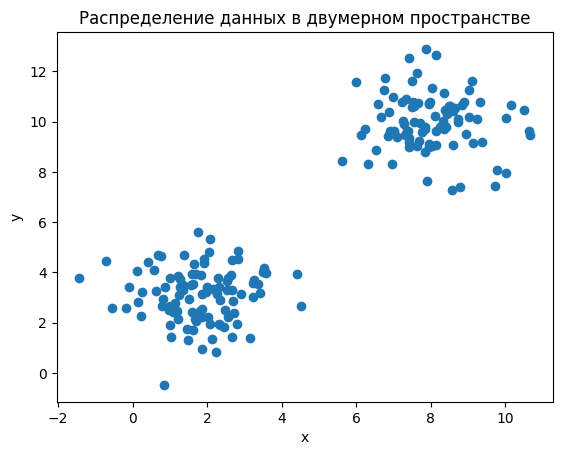

In [12]:
plt.scatter(df["x"], df["y"])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Распределение данных в двумерном пространстве')

In [ ]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

In [13]:
X = df[["x", "y"]]
X

,x,y
0,3.367596,3.536694
1,2.667870,4.479919
2,1.344171,3.282591
3,1.389414,4.683227
4,1.644644,4.320822
...,...,...
185,8.610144,10.429247
186,6.775686,11.724382
187,7.023465,9.632056
188,6.115584,9.449803


In [14]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=2)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

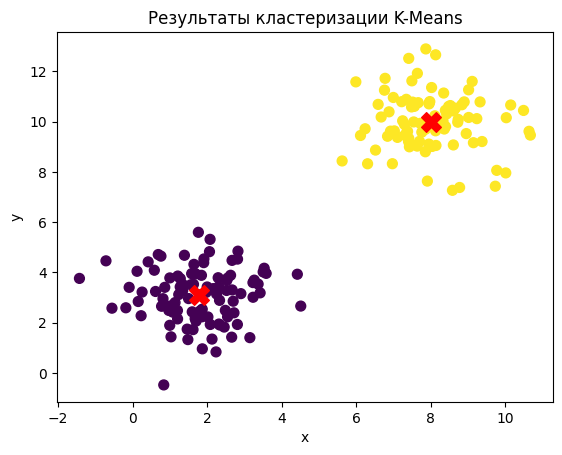

In [15]:
# Визуализируем результаты кластеризации двумерной кластеризации
plt.scatter(df["x"], df["y"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Результаты кластеризации K-Means')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


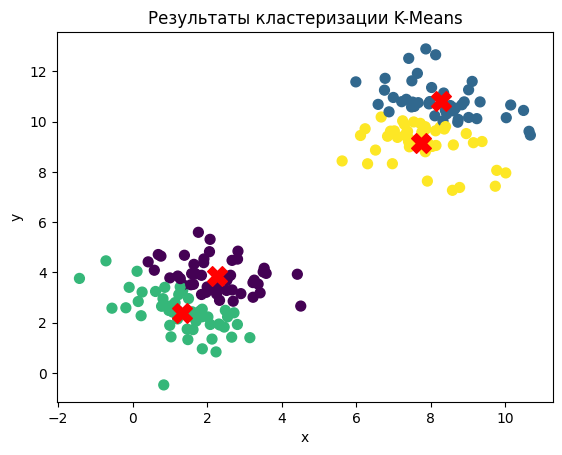

In [16]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=4)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
# Визуализируем результаты кластеризации
plt.scatter(df["x"], df["y"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [ ]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

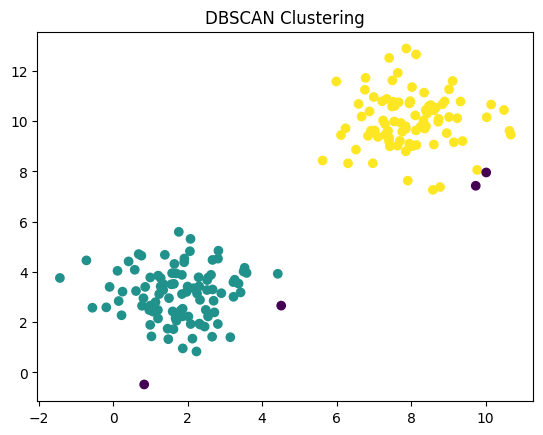

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

x_scaler = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(x_scaler)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels = dbscan.labels_

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

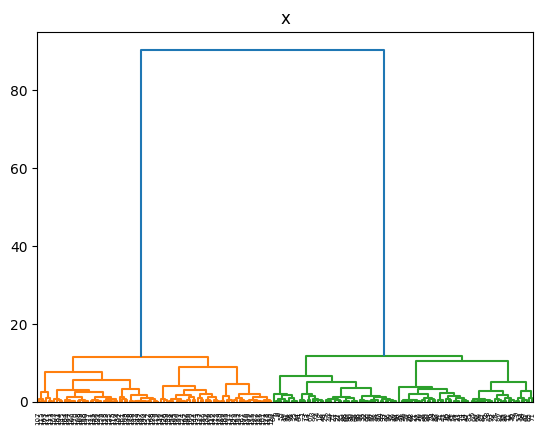

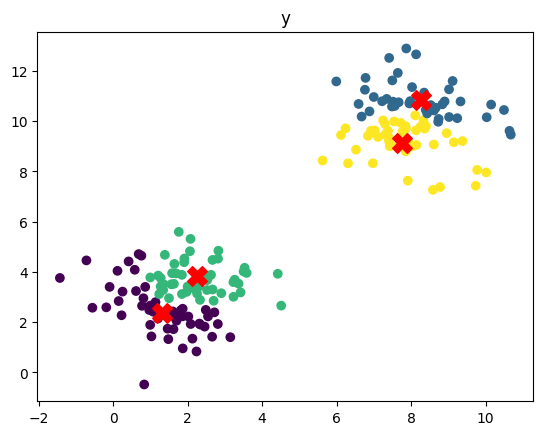

In [18]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(X)

# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('x')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.title('y')
plt.show()

In [ ]:
# your_code here

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here